# Ensemble Learning

Below we're going to use the IG method to implement a Decision Stump (Decision Tree with max_depth = 1) class from scratch.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
class DecisionStump:
    """
    A decision stump classifier for multi-class classification problems (depth = 1).
    """
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.value_left = None
        self.value_right = None

    def fit(self, X, y):
        """
        Fits a decision stump to the dataset (X, y).
        """
        best_gain = -1
        for feature_index in range(X.shape[1]):
            thresholds = X[:, feature_index]
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask
                y_left, y_right = y[left_mask], y[right_mask]
                if len(y_left) and len(y_right):
                    left_weight = len(y_left) / len(y)
                    right_weight = 1 - left_weight
                    gain = self._entropy(y) - (right_weight * self._entropy(y_right) + left_weight * self._entropy(y_left))
                    if gain > best_gain:
                        best_gain = gain
                        self.feature = feature_index
                        self.threshold = threshold
                        self.value_left = np.bincount(y_left).argmax()
                        self.value_right = np.bincount(y_right).argmax()

    def predict(self, X):
        """
        Predicts class labels for samples in X.
        """
        return np.where(X[:, self.feature] <= self.threshold, self.value_left, self.value_right)

    def _entropy(self, y):
        """
        Computes entropy for a set of labels.
        """        
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

In [111]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(f"Iris Features: {iris.feature_names}")
print(f"Iris Targets: {iris.target_names}")

Iris Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris Targets: ['setosa' 'versicolor' 'virginica']


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (120, 4), y_train: (120,)
Shape of X_test: (30, 4), y_test: (30,)


In [113]:
from sklearn.metrics import f1_score, accuracy_score

model = DecisionStump()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Decision Stump Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Decision Stump F1-Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

Decision Stump Accuracy: 0.633
Decision Stump F1-Score: 0.520


### Using Scikit-learn's Decision Tree Classifier

Sklearn DT Accuracy: 0.967
Sklearn DT F1-Score: 0.966


<function matplotlib.pyplot.show(close=None, block=None)>

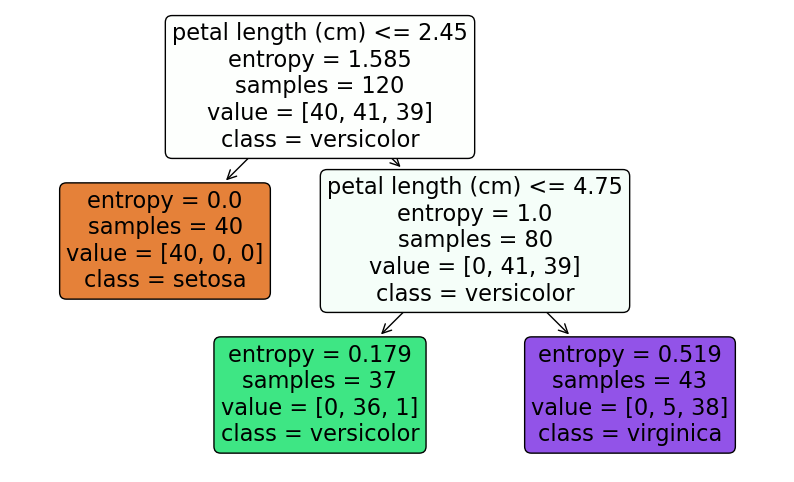

In [114]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion = "entropy", max_depth=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Sklearn DT Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Sklearn DT F1-Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

plt.figure(figsize=(10,6))
plt.title("Decision Tree Visualization - Sklearn")
plot_tree(model, feature_names=list(iris.feature_names), class_names=list(iris.target_names), filled=True, rounded=True)
plt.show

# Random Forest

In [115]:
from sklearn.utils import resample

class RandomForest:
    """
    A random forest classifier for multi-class classification problems (using decision stumps with depth 1).
    """    
    def __init__(self, n_trees=7):
        self.n_trees = n_trees
        self.trees = []

    def fit(self, X, y):
        """
        Fits a random forest to the dataset (X, y).
        """
        self.tree = []
        for _ in range(self.n_trees):
            stump = DecisionStump()
            X_sample, y_sample = self._bootstrap_samples(X, y)
            stump.fit(X_sample, y_sample)
            self.trees.append(stump)
        
    def predict(self, X):
        """
        Predicts class labels for samples in X.
        """
        stump_predictions = np.array([stump.predict(X) for stump in self.trees])
        return self.majority_vote(stump_predictions)
    
    def _bootstrap_samples(self, X, y):
        return resample(X, y, n_samples=len(X), replace=True)

    def majority_vote(self,predictions):
        """
        Returns the majority vote of the predictions.
        """
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

In [116]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

print(f"Breast Cancer Features: {data.feature_names}")
print("="*90)
print(f"Breast Cancer Target: {data.target_names}")

Breast Cancer Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer Target: ['malignant' 'benign']


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (455, 30), y_train: (455,)
Shape of X_test: (114, 30), y_test: (114,)


In [118]:
model = RandomForest()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Custom RF Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Custom RF F1-Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

Custom RF Accuracy: 0.930
Custom RF F1-Score: 0.929


In [119]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=7, max_depth=1, criterion="entropy", random_state=42)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

print(f"Sklearn RF Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Sklearn RF F1-Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

Sklearn RF Accuracy: 0.939
Sklearn RF F1-Score: 0.938


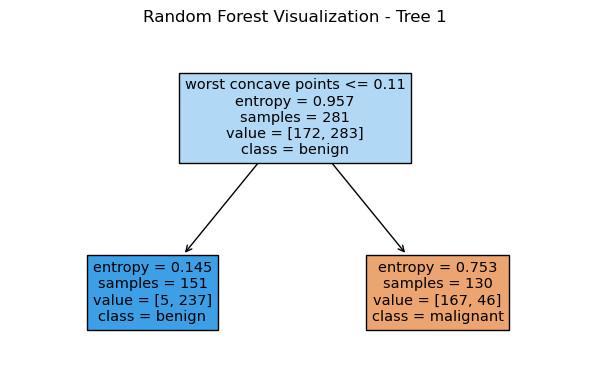

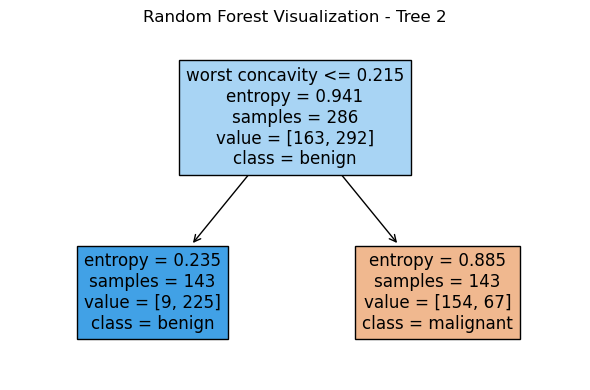

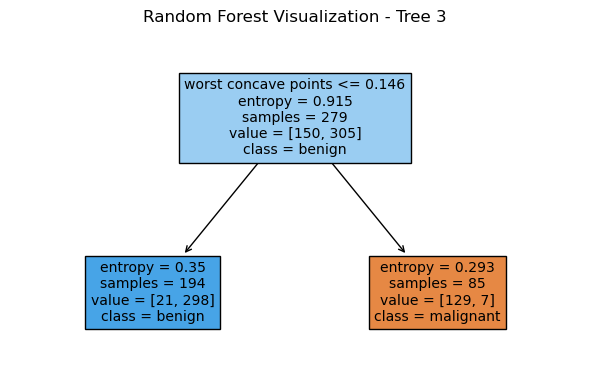

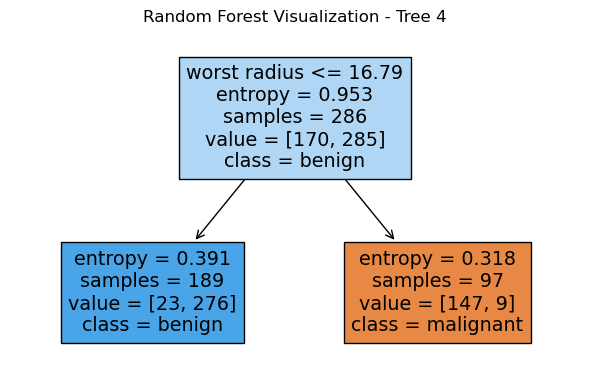

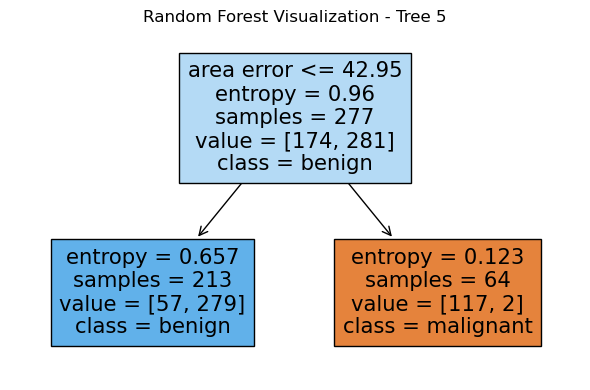

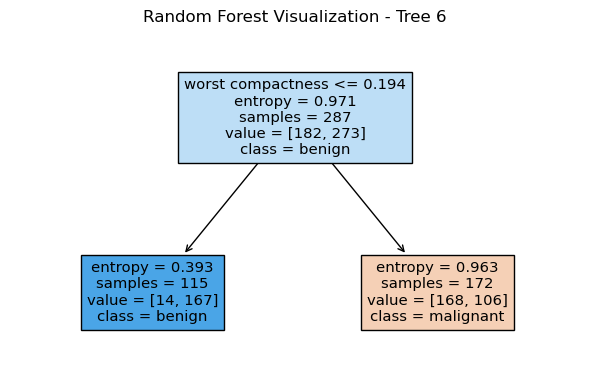

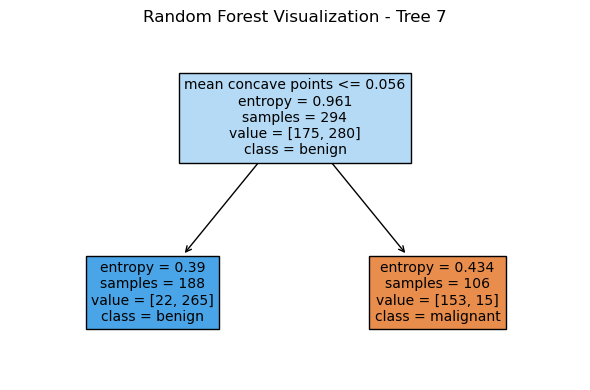

In [121]:
for idx, tree in enumerate(model.estimators_):
    plt.figure(figsize=(6,4))
    plot_tree(tree, feature_names=list(data.feature_names), class_names=list(data.target_names), filled=True)
    plt.title(f"Random Forest Visualization - Tree {idx + 1}")
    plt.tight_layout()
    plt.show()